## In this note book (without risk factor)
### Compute the Mean Squared Errors 
### Finally have the same data set with friends

## Data Import and Matrix Split

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import random

### Fill in gender in R1 and R2 matrix

In [2]:
df = pd.read_csv('Intersection_Y1R1R2_0702Y1_R1_R2_on_0702clean_data.csv')

In [3]:
df = pd.read_csv('Intersection_Y1R1R2_0702Y1_0702.csv')
Y1 = df.loc[:, 'UniqueID':'t39_combo']
Y1['Gender'] = df['Gender']

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,UniqueID,a1_combo,a2_combo,a3_combo,a4_combo,a5_combo,a6_combo,b7_combo,...,Age,Date,Gender,GRYD_Zone,Ethnicity_Asian,Ethnicity_Black,Ethnicity_Latino,Ethnicity_White,Ethnicity_Other,RiskFactor
0,0,851,3538.0,3.0,3.0,4.0,4.0,3.0,2.0,3.0,...,13.0,2009-11-12,1.0,4.0,0.0,0.0,1.0,0.0,0.0,7.0
1,3,869,3552.0,3.0,4.0,4.0,3.0,4.0,2.0,4.0,...,14.0,2009-11-16,2.0,5.0,0.0,0.0,1.0,0.0,0.0,7.0
2,6,892,3569.0,3.0,5.0,4.0,1.0,4.0,2.0,5.0,...,13.0,2009-11-17,1.0,17.0,0.0,0.0,1.0,0.0,0.0,7.0
3,9,895,3570.0,3.0,4.0,2.0,3.0,4.0,3.0,3.0,...,10.0,2009-11-18,1.0,17.0,1.0,0.0,0.0,0.0,0.0,5.0
4,12,919,3586.0,4.0,4.0,5.0,5.0,4.0,1.0,3.0,...,11.0,2009-11-19,2.0,4.0,0.0,0.0,1.0,0.0,0.0,7.0


In [5]:
df = pd.read_csv('Intersection_Y1R1R2_0702R1_0702.csv')
R1 = df.loc[:, 'UniqueID':'t39_combo']
R1['Gender'] = df['Gender']

In [6]:
df = pd.read_csv('Intersection_Y1R1R2_0702R2_0702.csv')
R2 = df.loc[:, 'UniqueID':'t39_combo']
R2['Gender'] = df['Gender']

In [7]:
# change all nan gender values in R1 according to their values in Y1

for index in R1.index:
    gender = Y1.loc[index,'Gender']
    R1.loc[index, 'Gender'] = gender

In [8]:
# change all nan gender values in R2 according to their values in Y1

for index in R2.index:
    gender = Y1.loc[index,'Gender']
    R2.loc[index, 'Gender'] = gender

### Drop IDs with Nan values

In [9]:
#indices
columns = Y1.columns.tolist()
columns = columns[:-1]

#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(Y1[Y1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list = list(my_set)
unique_index_list

[]

In [10]:
#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R1[R1[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list1 = list(my_set)
unique_index_list1

[512, 770, 169, 624, 402, 56, 1087, 927]

In [11]:
#create list of indices that have NaN values in their rows
index_list=[]
for col in columns:   
    index_list.extend(R2[R2[col].isnull()].index.tolist())
index_list

#make this list unique
my_set = set(index_list)
unique_index_list2 = list(my_set)
unique_index_list2

[1297, 182, 347, 446, 763]

In [12]:
#make list of UniqueIDs associated with these NaN values
ID_list = []
for i in unique_index_list1:
    ID_list.append(R1.loc[i,'UniqueID'])
ID_list

[14334.0, 17710.0, 11189.0, 16486.0, 12668.0, 4960.0, 25920.0, 22418.0]

In [13]:
#make list of UniqueIDs associated with these NaN values
for i in unique_index_list2:
    ID_list.append(R2.loc[i,'UniqueID'])
ID_list

[14334.0,
 17710.0,
 11189.0,
 16486.0,
 12668.0,
 4960.0,
 25920.0,
 22418.0,
 32402.0,
 11205.0,
 12560.0,
 13876.0,
 17696.0]

In [14]:
#drop these IDs from the data
for id in ID_list:
    Y1 = Y1[Y1['UniqueID']!=id]

In [15]:
#drop these IDs from the data
for id in ID_list:
    R1 = R1[R1['UniqueID']!=id]

In [16]:
#drop these IDs from the data
for id in ID_list:
    R2 = R2[R2['UniqueID']!=id]

## Add gender control indicator in the input matrix

In [17]:
Y1['Gender1'] = 0
Y1['Gender2'] = 0
for i in Y1.index:
    if Y1.loc[i,'Gender'] == 1:
        Y1.set_value(i,'Gender1',1) 
        Y1.set_value(i,'Gender2',0) 
    else:
        Y1.set_value(i,'Gender1',0) 
        Y1.set_value(i,'Gender2',1) 

In [18]:
R1['Gender1'] = 0
R1['Gender2'] = 0
for i in R1.index:
    if R1.loc[i,'Gender'] == 1:
        R1.set_value(i,'Gender1',1) 
        R1.set_value(i,'Gender2',0) 
    else:
        R1.set_value(i,'Gender1',0) 
        R1.set_value(i,'Gender2',1) 

In [19]:
R2['Gender1'] = 0
R2['Gender2'] = 0
for i in R2.index:
    if R2.loc[i,'Gender'] == 1:
        R2.set_value(i,'Gender1',1) 
        R2.set_value(i,'Gender2',0) 
    else:
        R2.set_value(i,'Gender1',0) 
        R2.set_value(i,'Gender2',1) 

In [20]:
R2.head()

,UniqueID,a1_combo,a2_combo,a3_combo,a4_combo,a5_combo,a6_combo,b7_combo,b8_combo,b9_combo,...,h33_combo,h34_combo,h35_combo,h36_combo,h37_combo,t38_combo,t39_combo,Gender,Gender1,Gender2
0,3538.0,2.0,4.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,0.0,0.0,1.0,1,0
1,3552.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,...,2.0,1.0,1.0,3.0,1.0,0.0,0.0,2.0,0,1
2,3569.0,4.0,4.0,3.0,1.0,1.0,2.0,4.0,4.0,4.0,...,4.0,3.0,2.0,4.0,2.0,0.0,1.0,1.0,1,0
3,3570.0,2.0,3.0,2.0,2.0,2.0,1.0,2.0,1.0,2.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1,0
4,3586.0,4.0,4.0,4.0,1.0,4.0,1.0,3.0,4.0,4.0,...,1.0,1.0,2.0,2.0,4.0,0.0,0.0,2.0,0,1


In [21]:
Y1 = Y1.drop('UniqueID',axis = 1)
Y1 = Y1.drop('Gender',axis = 1)

In [22]:
Y1 = Y1.transpose()
Y1.shape

(41, 1663)

In [23]:
R1 = R1.drop('UniqueID',axis = 1)
R1 = R1.drop('Gender',axis = 1)
R1 = R1.transpose()

In [24]:
R2 = R2.drop('UniqueID',axis = 1)
R2 = R2.drop('Gender',axis = 1)
R2 = R2.transpose()

## Standardize all responses to (0,1)

In [25]:
for i in range(1663):
    Y1.iloc[37,i]=Y1.iloc[37,i]+1
    Y1.iloc[38,i]=Y1.iloc[38,i]+1
    R1.iloc[37,i]=R1.iloc[37,i]+1
    R1.iloc[38,i]=R1.iloc[38,i]+1
    R2.iloc[37,i]=R2.iloc[37,i]+1
    R2.iloc[38,i]=R2.iloc[38,i]+1

In [26]:
newlist=[]
for i in range(9):
    newlist.append(i)
for i in range(16,39):
    newlist.append(i)

In [27]:
for i in newlist:
    for j in range (1663):
        Y1.iloc[i,j]=(Y1.iloc[i,j]-1)/4
        R1.iloc[i,j]=(R1.iloc[i,j]-1)/4
        R2.iloc[i,j]=(R2.iloc[i,j]-1)/4

In [28]:
Y1_r = Y1[0:39]
Y1_f = Y1[39:41]

In [29]:
R1_r = R1[0:39]
R1_f = R1[39:41]

In [30]:
R2_r = R2[0:39]
R2_f = R2[39:41]

## DMDc for Gender

### Y1 to R1

In [31]:
#Define the dimension parameters for later code

XwC = 41
X = 39
C = 2

In [32]:
#SVD for the Omega matrices(Combination of the original X-input matrix and control factors)

U_Y1,Sig_Y1,V_Y1=np.linalg.svd(Y1, full_matrices=False)    
V_Y1_T=V_Y1.conjugate().transpose()
Sig_inv_Y1=np.zeros((XwC, XwC))
for i in range(XwC):
    for j in range(XwC):
        if i==j:
            Sig_inv_Y1[i][j]=1/Sig_Y1[i]

In [33]:
#Splitting U matrixes to one include only information of responses and another one with control factors

U_Y1_Q = U_Y1[:X,:]
U_Y1_Q_T = U_Y1_Q.conjugate().transpose()
U_Y1_G = U_Y1[X:XwC,:]
U_Y1_G_T = U_Y1_G.conjugate().transpose()

In [34]:
#SVD for the X' matrix(the next time input matrix of only questions)

U_R1_r,Sig_R1_r,V_R1_r=np.linalg.svd(R1_r, full_matrices=False)
U_R1_r_T = U_R1_r.conjugate().transpose()
V_R1_r_T=V_R1_r.conjugate().transpose()
Sig_inv_R1_r=np.zeros((X, X))
for i in range(X):
    for j in range(X):
        if i==j:
            Sig_inv_R1_r[i][j]=1/Sig_R1_r[i]

In [35]:
U_Y1_Q.shape

(39, 41)

In [36]:
A_step2=np.dot(R1_r,V_Y1_T)
A_step3=np.dot(A_step2,Sig_inv_Y1)
A_Y1_R1=np.dot(A_step3,U_Y1_Q_T)
A_Y1_R1.shape

(39, 39)

In [37]:
#Calculate the transformation B matrix

B_Y1_R1=np.dot(A_step3,U_Y1_G_T)
B_Y1_R1.shape

(39, 2)

In [38]:
B_Y1_R1

array([[ 0.13356369,  0.13428222],
       [ 0.2173309 ,  0.25654848],
       [ 0.23611937,  0.25142784],
       [-0.05129965, -0.05071058],
       [ 0.08749711,  0.0766599 ],
       [-0.00797309, -0.01932216],
       [ 0.13970694,  0.10831497],
       [ 0.11264024,  0.0830476 ],
       [ 0.12463495,  0.10083527],
       [ 0.42132846,  0.41840329],
       [ 0.00841081, -0.01805792],
       [ 0.14537799,  0.10424889],
       [ 0.21957778,  0.22287956],
       [ 0.18689165,  0.32465785],
       [ 0.51943271,  0.55884373],
       [ 0.17586073,  0.21174015],
       [ 0.19068959,  0.18156252],
       [ 0.15858518,  0.17337482],
       [ 0.23697405,  0.23596232],
       [ 0.25429686,  0.27391558],
       [ 0.16476129,  0.17321688],
       [ 0.29761262,  0.29196002],
       [ 0.15476635,  0.12638448],
       [ 0.18135581,  0.17499266],
       [ 0.20132177,  0.18462245],
       [ 0.31919961,  0.30102642],
       [ 0.17078888,  0.19150907],
       [ 0.05598076,  0.06780759],
       [ 0.24915676,

In [39]:
values_Y1, vectors_Y1 = np.linalg.eig(A_Y1_R1)

In [40]:
values_Y1

array([0.54167963+0.02026086j, 0.54167963-0.02026086j,
       0.45593889+0.j        , 0.36957428+0.j        ,
       0.32822652+0.05169922j, 0.32822652-0.05169922j,
       0.32055141+0.j        , 0.25639068+0.10883483j,
       0.25639068-0.10883483j, 0.29004203+0.04284708j,
       0.29004203-0.04284708j, 0.2016897 +0.11459722j,
       0.2016897 -0.11459722j, 0.26903261+0.j        ,
       0.23485803+0.06530228j, 0.23485803-0.06530228j,
       0.02386174+0.04392327j, 0.02386174-0.04392327j,
       0.0585216 +0.09035846j, 0.0585216 -0.09035846j,
       0.02915528+0.00844593j, 0.02915528-0.00844593j,
       0.23889841+0.j        , 0.09139193+0.09652296j,
       0.09139193-0.09652296j, 0.11407404+0.09367892j,
       0.11407404-0.09367892j, 0.19830859+0.03265356j,
       0.19830859-0.03265356j, 0.16536369+0.06834159j,
       0.16536369-0.06834159j, 0.06335322+0.j        ,
       0.10971831+0.06691684j, 0.10971831-0.06691684j,
       0.10535385+0.04978659j, 0.10535385-0.04978659j,
       0.1

In [41]:
eiglog_Y1 = np.log(values_Y1)

In [42]:
lamphi_Y1=np.zeros(39)
for i in range (39):
    rep=vectors_Y1[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_Y1[i])*norm
    lamphi_Y1[i]=val

### R1 to R2

In [43]:
#SVD for the Omega matrices(Combination of the original X-input matrix and control factors)

U_R1,Sig_R1,V_R1=np.linalg.svd(R1, full_matrices=False)    
V_R1_T=V_R1.conjugate().transpose()
Sig_inv_R1=np.zeros((XwC, XwC))
for i in range(XwC):
    for j in range(XwC):
        if i==j:
            Sig_inv_R1[i][j]=1/Sig_R1[i]

In [44]:
#Splitting U matrixes to one include only information of responses and another one with control factors

U_R1_Q = U_R1[:X,:]
U_R1_Q_T = U_R1_Q.conjugate().transpose()
U_R1_G = U_R1[X:XwC,:]
U_R1_G_T = U_R1_G.conjugate().transpose()

In [45]:
#SVD for the X' matrix(the next time input matrix of only questions)

U_R2_r,Sig_R2_r,V_R2_r=np.linalg.svd(R2_r, full_matrices=False)
U_R2_r_T = U_R2_r.conjugate().transpose()
V_R2_r_T=V_R2_r.conjugate().transpose()
Sig_inv_R2_r=np.zeros((X, X))
for i in range(X):
    for j in range(X):
        if i==j:
            Sig_inv_R2_r[i][j]=1/Sig_R2_r[i]

In [46]:
#Calculate the transformation A matrix (dimension X*X)

A_step2=np.dot(R2_r,V_R1_T)
A_step3=np.dot(A_step2,Sig_inv_R1)
A_R1_R2=np.dot(A_step3,U_R1_Q_T)

In [47]:
#Calculate the transformation B matrix

B_R1_R2=np.dot(A_step3,U_R1_G_T)
B_R1_R2.shape

(39, 2)

In [48]:
values_R1, vectors_R1 = np.linalg.eig(A_R1_R2)

In [49]:
eiglog_R1 = np.log(values_R1)

In [50]:
lamphi_R1=np.zeros(39)
for i in range (39):
    rep=vectors_R1[i]
    norm=np.linalg.norm(rep)
    val=np.absolute(values_R1[i])*norm
    lamphi_R1[i]=val

## Compute MSE between predictions and actual

### Y1 to R1

In [51]:
predictions_A = np.dot(A_Y1_R1,Y1_r)
predictions_B = np.dot(B_Y1_R1,Y1_f)
predictions = predictions_A + predictions_B

In [52]:
df = pd.DataFrame(predictions)
df.to_csv('predictions_Y1_R1.csv')

In [53]:
mse = mean_squared_error(R1_r, predictions)
mse

0.0959157055804698

## Graphs

In [55]:
label=['a1', 'a2',
       'a3', 'a4', 'a5', 'a6', 'b7', 'b8',
       'b9', 'c10', 'c11', 'c12', 'c13',
       'c14', 'c15', 'c16', 'de17', 'de18',
       'de19', 'de20', 'f21', 'f22', 'f23o',
       'f24', 'f25', 'f26', 'g27', 'g28',
       'g29', 'g30', 'g31', 'h32', 'h33',
       'h34', 'h35', 'h36', 'h37', 't38',
       't39']

### Y1 to R1

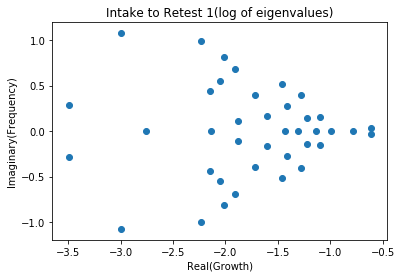

In [56]:
plt.scatter(eiglog_Y1.real,eiglog_Y1.imag)
plt.title('Intake to Retest 1(log of eigenvalues)') 
plt.xlabel('Real(Growth)')
plt.ylabel('Imaginary(Frequency)')
plt.show()

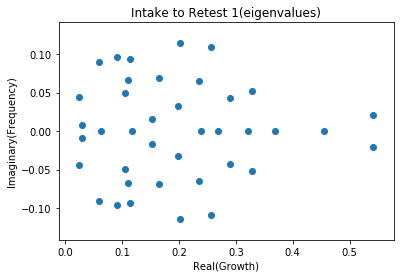

In [57]:
#plot real and imaginary parts of the eigenvalues
plt.scatter(values_Y1.real,values_Y1.imag)
plt.title('Intake to Retest 1(eigenvalues)') 
plt.xlabel('Real(Growth)')
plt.ylabel('Imaginary(Frequency)')
plt.show()

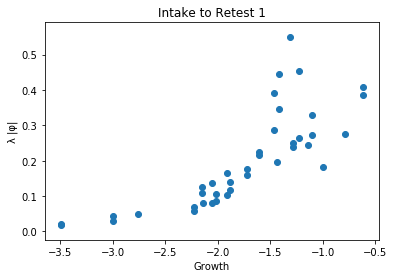

In [58]:
#plot of real part of log(eigenvalue) vs lambda*eigenvector
plt.scatter(eiglog_Y1.real,lamphi_Y1)
plt.title('Intake to Retest 1') 
plt.xlabel('Growth')
plt.ylabel(u'\u03BB' ' |' u'\u03C6''|')
plt.show()

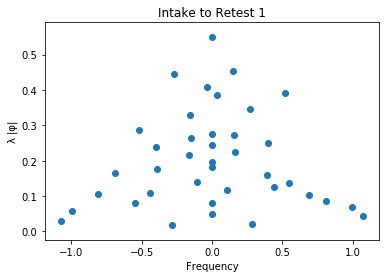

In [59]:
#plot of imaginary part of log(eigenvalue) vs lambda*eigenvector
plt.scatter(eiglog_Y1.imag,lamphi_Y1)
plt.title('Intake to Retest 1') 
plt.xlabel('Frequency')
plt.ylabel(u'\u03BB' ' |' u'\u03C6''|')
plt.show()

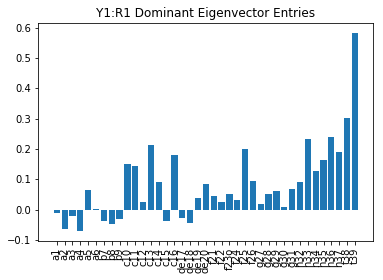

In [60]:
index=np.zeros(39)
weiabs=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs[j]=vectors_Y1[j,0].real
plt.title('Y1:R1 Dominant Eigenvector Entries') 
plt.xticks(np.arange(min(index), max(index)+1, 1.0), label, rotation='vertical')
plt.bar(index,weiabs)
plt.show()

### R1 to R2

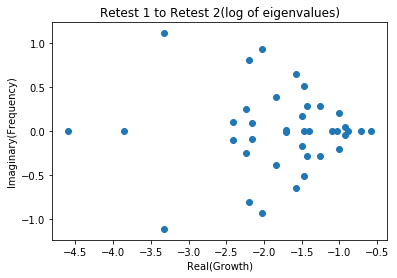

In [61]:
plt.scatter(eiglog_R1.real,eiglog_R1.imag)
plt.title('Retest 1 to Retest 2(log of eigenvalues)') 
plt.xlabel('Real(Growth)')
plt.ylabel('Imaginary(Frequency)')
plt.show()

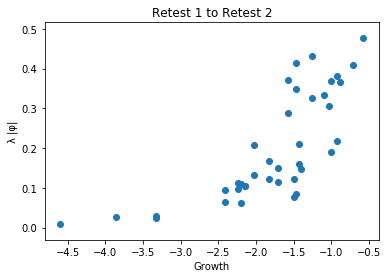

In [62]:
#plot of real part of log(eigenvalue) vs lambda*eigenvector
plt.scatter(eiglog_R1.real,lamphi_R1)
plt.title('Retest 1 to Retest 2') 
plt.xlabel('Growth')
plt.ylabel(u'\u03BB' ' |' u'\u03C6''|')
plt.show()

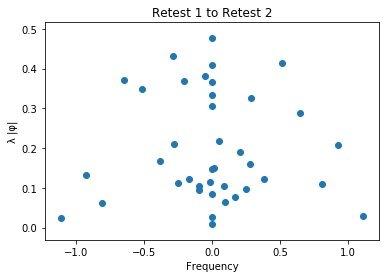

In [63]:
#plot of imaginary part of log(eigenvalue) vs lambda*eigenvector
plt.scatter(eiglog_R1.imag,lamphi_R1)
plt.title('Retest 1 to Retest 2') 
plt.xlabel('Frequency')
plt.ylabel(u'\u03BB' ' |' u'\u03C6''|')
plt.show()

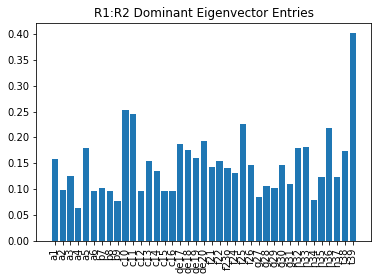

In [64]:
index=np.zeros(39)
weiabs=np.zeros(39)
for i in range (39):
    index[i]=i
for j in range (39):
    weiabs[j]=vectors_R1[j,0].real
plt.title('R1:R2 Dominant Eigenvector Entries') 
plt.xticks(np.arange(min(index), max(index)+1, 1.0), label, rotation='vertical')
plt.bar(index,weiabs)
plt.show()